In [1]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np

In [2]:
sample_rate, samples = wavfile.read('BeeAudio1.wav')
print(samples)
samples_zero = samples[:,0]
print(samples_zero,sample_rate)
samples_casted = samples_zero.astype(np.float32) / (2.**15)
f, t, Zxx = signal.stft(samples_casted, fs = sample_rate, nperseg = 800, noverlap = 480, nfft = 1024)
print(f,'\n', t,'\n',Zxx)
# frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate
Zxx_abs = np.abs(Zxx)
print(type(f), type(t), type(Zxx))

[[    0     0]
 [    0     0]
 [    0     0]
 ...
 [ -965  -905]
 [-1083  -915]
 [-1327 -1140]]
[    0     0     0 ...  -965 -1083 -1327] 32000
[    0.      31.25    62.5     93.75   125.     156.25   187.5    218.75
   250.     281.25   312.5    343.75   375.     406.25   437.5    468.75
   500.     531.25   562.5    593.75   625.     656.25   687.5    718.75
   750.     781.25   812.5    843.75   875.     906.25   937.5    968.75
  1000.    1031.25  1062.5   1093.75  1125.    1156.25  1187.5   1218.75
  1250.    1281.25  1312.5   1343.75  1375.    1406.25  1437.5   1468.75
  1500.    1531.25  1562.5   1593.75  1625.    1656.25  1687.5   1718.75
  1750.    1781.25  1812.5   1843.75  1875.    1906.25  1937.5   1968.75
  2000.    2031.25  2062.5   2093.75  2125.    2156.25  2187.5   2218.75
  2250.    2281.25  2312.5   2343.75  2375.    2406.25  2437.5   2468.75
  2500.    2531.25  2562.5   2593.75  2625.    2656.25  2687.5   2718.75
  2750.    2781.25  2812.5   2843.75  2875.    2906.2

/Users/paulliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/paulliu/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:860: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/Users/paulliu/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:861: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/paulliu/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


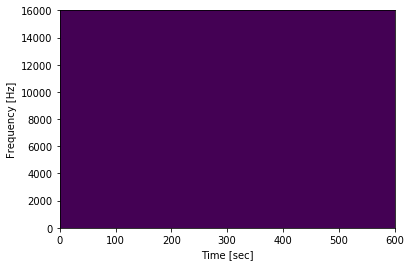

NameError: name 'imshow' is not defined

In [12]:
Zxx_log = np.log(Zxx_abs)
plt.pcolormesh(t, f, Zxx_log, vmin = Zxx_log.min(), vmax = Zxx_log.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
samples_casted.dtype

In [13]:
samples = samples / (2.**15)
sample_shape = samples.shape
samplePoints = float(samples.shape[0])
# print(samples/(2.**15))
print(sample_shape)
print(samplePoints)
duration = samplePoints/sample_rate
print(duration)

(19200000, 2)
19200000.0
600.0


In [40]:
sound_mono = samples[:,0]
print(sound_mono)

[    0     0     0 ...  -965 -1083 -1327]


(513, 60001)
-31618 31798


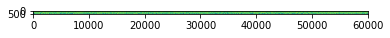

In [11]:
print(Zxx.shape)
print(np.min(samples),np.max(samples))
plt.imshow(Zxx_log)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
